![spotify](https://storage.googleapis.com/pr-newsroom-wp/1/2022/01/Spotify-Generic-Header-1440x820-1-1440x733.png)

# Analyzing the top 10,000 Spotify Songs
## By: Lauren McNaboe :D

## Column Title Explanation
Index: Number on Excel Sheet<br>
Highest Charting Position: Highest position on the chart <br>
Number of Times Charted: Number of Times on the chart <br>
Week of Highest Charting: Number of weeks spent at peak position <br>
Song Name: Name of the Song<br>
Artist Name: Name of the Artist<br>
Artist Followers: Number of followers on Spotify<br>
Song ID: Spotify Song ID<br>
Genre: Genre of Music <br>
Release Date: Date Song was Released <br>
Popularity: Popularity on a scale from 0-100 <br>
Danceability: Dancibility on a scale of 0-1 <br>
Energy: Energy on a scale of 0-1<br>
Loudness: Loudness on a scale of -60-0 dB<br>
Tempo: BPM of the song<br>
Duration: Length of the song (s) <br>
Chord: Main chord of the instruments <br>
Year Released: Year the song came out <br>
Month Released: Month the song came out <br>

Link to dataset: https://www.kaggle.com/datasets/sashankpillai/spotify-top-200-charts-20202021

In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

### Why did I choose this dataset?
I listen to music for 99% of my free time. I listen to music while I do my homework, in the car/on the bus, in the shower (tmi), playing The Sims 4, and just Sitting. I love looking at top charts and seeing how songs have moved over time. I love thinking about why certain songs charted and what could have influenced their spot. I have always been interested in charts and how things perform in a public space, and music is one of the best ways I can see that in our society. 

### Explanation of the Dataset
Sashank Pillai, the owner, created a data set of all of the songs that made it on the top 200 songs on Spotify from 2020-2021. He has many columns that came from spotifycharts.com that explain the elements of the songs that charted. It also has the artist and the title of the song. Spotipy was used to read in and evaluate the music that charted over these 2 years. Spotipy takes information from the Spotify API and rates each song with the parameters.

### Reading in the DataFrame

In [105]:
df = pd.read_csv('./data/spotify_dataset.csv')

In [106]:
df.head(10)

,Index,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Song Name,Streams,Artist,Artist Followers,Song ID,Genre,Release Date,Weeks Charted,Popularity,Danceability,Energy,Loudness,Tempo,Duration (ms),Chord,Duration (s)
0,66,2,83,2020-03-27--2020-04-03,Don't Start Now,8821971,Dua Lipa,1250353,7njGslFmqBmOSSOpTyZCs9,[],8/13/2021,2021-07-23--2021-07-30\n2021-07-16--2021-07-23...,0,0.79,0.79,-4.52,123.95,183290,B,183.290
1,84,76,3,2020-03-27--2020-04-03,Love Again,7465445,Dua Lipa,1250353,2sN1pMv6d2t5GlvN6IBMlK,[],8/13/2021,2021-07-23--2021-07-30\n2021-07-16--2021-07-23...,0,0.66,0.67,-4.67,115.98,258004,B,258.004
2,119,5,21,2021-03-19--2021-03-26,Hold On,6300416,Justin Bieber,1250353,49xx65gvlD7xXjDTavFqaJ,[],8/13/2021,2021-07-23--2021-07-30\n2021-07-16--2021-07-23...,0,0.66,0.63,-5.80,139.98,170813,C#/Db,170.813
3,157,68,6,2021-07-02--2021-07-09,Ramenez la coupe à la maison,5576844,Vegedream,1250353,0dqVP9CnGjaYNjya3gYbYy,[],8/13/2021,2021-07-23--2021-07-30\n2021-07-16--2021-07-23...,0,0.81,0.66,-6.24,107.99,235556,C,235.556
4,165,13,83,2020-01-24--2020-01-31,bad guy,5436286,Billie Eilish,1250353,1hewNsVmijBqjKvFRQfk4m,[],8/13/2021,2021-07-23--2021-07-30\n2021-07-16--2021-07-23...,0,0.70,0.43,-10.97,135.13,194088,G,194.088
5,286,6,26,2021-01-01--2021-01-08,Anyone,5079587,Justin Bieber,1250353,2RwMwWo43LapkA4raptxaB,[],8/13/2021,2021-06-18--2021-06-25\n2021-06-11--2021-06-18...,0,0.69,0.54,-8.03,115.88,190779,D,190.779
6,309,2,31,2020-11-13--2020-11-20,Therefore I Am,5265630,Billie Eilish,1250353,0aACcc1jEv2C6VSmmJbllJ,[],8/13/2021,2021-06-11--2021-06-18\n2021-06-04--2021-06-11...,0,0.89,0.34,-7.77,94.01,174321,B,174.321
7,312,39,6,2021-05-07--2021-05-14,Higher Power,5142982,Coldplay,1250353,4rOEoKL0fHrxBMhVljpbGW,[],8/13/2021,2021-06-11--2021-06-18\n2021-06-04--2021-06-11...,0,0.51,0.83,-6.02,178.03,211295,A#/Bb,211.295
8,326,3,33,2020-12-25--2021-01-01,BICHOTA,5201714,KAROL G,1250353,4nYLZSNXJyPq8Jj3cEdykP,[],8/13/2021,2021-06-04--2021-06-11\n2021-05-28--2021-06-04...,0,0.86,0.67,-4.16,163.91,178947,C#/Db,178.947
9,378,10,69,2019-12-27--2020-01-03,everything i wanted,5448680,Billie Eilish,1250353,1OC8hMoqAuWmTWJ4heJNlO,[],8/13/2021,2021-05-07--2021-05-14\n2021-04-30--2021-05-07...,0,0.70,0.23,-14.45,120.01,245426,F#/Gb,245.426


In [107]:
df.corr()

C:\Users\lmcnaboe\AppData\Local\Temp\ipykernel_4772\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Index,Highest Charting Position,Number of Times Charted,Streams,Artist Followers,Popularity,Danceability,Energy,Loudness,Tempo,Duration (ms),Duration (s)
Index,1.000000,0.251694,-0.360271,-0.258688,0.090746,-0.335229,0.126422,-0.019604,-0.015226,0.023829,-0.023926,-0.023926
Highest Charting Position,0.251694,1.000000,-0.417312,-0.296137,-0.233079,-0.161503,0.017964,0.066953,0.037012,0.025217,-0.031723,-0.031723
Number of Times Charted,-0.360271,-0.417312,1.000000,-0.060362,0.027022,0.231905,0.026314,-0.062616,0.029200,-0.047860,0.032907,0.032907
Streams,-0.258688,-0.296137,-0.060362,1.000000,0.103473,0.124238,-0.080982,0.004999,-0.030292,0.053312,0.016476,0.016476
Artist Followers,0.090746,-0.233079,0.027022,0.103473,1.000000,0.103086,-0.097677,-0.068445,-0.035710,-0.019400,0.141260,0.141260
Popularity,-0.335229,-0.161503,0.231905,0.124238,0.103086,1.000000,0.026410,0.088246,0.152069,-0.023148,0.078425,0.078425
Danceability,0.126422,0.017964,0.026314,-0.080982,-0.097677,0.026410,1.000000,0.140490,0.233392,-0.039476,-0.103872,-0.103872
Energy,-0.019604,0.066953,-0.062616,0.004999,-0.068445,0.088246,0.140490,1.000000,0.730684,0.115415,0.051940,0.051940
Loudness,-0.015226,0.037012,0.029200,-0.030292,-0.035710,0.152069,0.233392,0.730684,1.000000,0.107229,0.070179,0.070179
Tempo,0.023829,0.025217,-0.047860,0.053312,-0.019400,-0.023148,-0.039476,0.115415,0.107229,1.000000,-0.003174,-0.003174


In [108]:
df.describe()

,Index,Highest Charting Position,Number of Times Charted,Streams,Artist Followers,Popularity,Danceability,Energy,Loudness,Tempo,Duration (ms),Duration (s)
count,1543.000000,1543.000000,1543.000000,1.543000e+03,1.543000e+03,1543.000000,1543.000000,1543.000000,1543.000000,1543.000000,1543.000000,1543.000000
mean,779.261180,87.734284,10.696695,6.336013e+06,1.472956e+07,70.132210,0.690577,0.634556,-6.339423,122.785988,198030.746598,198.030747
std,449.871852,58.114723,16.396673,3.377446e+06,1.668289e+07,15.789287,0.142397,0.160948,2.496738,29.579107,47112.345776,47.112346
min,1.000000,1.000000,1.000000,4.176083e+06,4.883000e+03,0.000000,0.150000,0.050000,-25.170000,46.720000,30133.000000,30.133000
25%,388.500000,37.000000,1.000000,4.914881e+06,2.123734e+06,65.000000,0.600000,0.530000,-7.490000,97.960000,169343.500000,169.343500
50%,781.000000,80.000000,4.000000,5.266625e+06,6.852509e+06,73.000000,0.710000,0.640000,-5.990000,122.010000,193636.000000,193.636000
75%,1169.500000,136.500000,12.000000,6.442538e+06,2.269875e+07,80.000000,0.800000,0.750000,-4.700000,143.820000,218975.000000,218.975000
max,1556.000000,200.000000,142.000000,4.863345e+07,8.333778e+07,100.000000,0.980000,0.970000,1.510000,205.270000,588139.000000,588.139000


### Checking Type of Variable (why are they all objects that was very annoying)

In [109]:
df.dtypes
df['Loudness']=df['Loudness'].astype('float')
df.dtypes

Index                          int64
Highest Charting Position      int64
Number of Times Charted        int64
Week of Highest Charting      object
Song Name                     object
Streams                        int64
Artist                        object
Artist Followers               int64
Song ID                       object
Genre                         object
Release Date                  object
Weeks Charted                 object
Popularity                     int64
Danceability                 float64
Energy                       float64
Loudness                     float64
Tempo                        float64
Duration (ms)                  int64
Chord                         object
Duration (s)                 float64
dtype: object

### Changing Certain Variables to strings and floats depending on what they were

In [110]:
df['Artist'].astype('str')
df['Genre'].astype('str')
df['Energy'].astype('float')
df['Loudness'].astype('float')

0       -4.52
1       -4.67
2       -5.80
3       -6.24
4      -10.97
        ...  
1538    -8.44
1539    -9.07
1540    -7.01
1541    -7.15
1542   -15.23
Name: Loudness, Length: 1543, dtype: float64

### Top 20 Charters

In [111]:
artist_charted = df[['Artist', 'Number of Times Charted']].groupby('Artist', as_index = False).count()
artist_charted.sort_values(by='Number of Times Charted', ascending = False).head(20)

,Artist,Number of Times Charted
635,Taylor Swift,52
387,Lil Uzi Vert,32
316,Justin Bieber,32
312,Juice WRLD,30
531,Pop Smoke,29
53,BTS,29
55,Bad Bunny,28
210,Eminem,22
649,The Weeknd,21
192,Drake,19


### Plot of the Top 25 Artists with the Most Songs Charted

<AxesSubplot:>

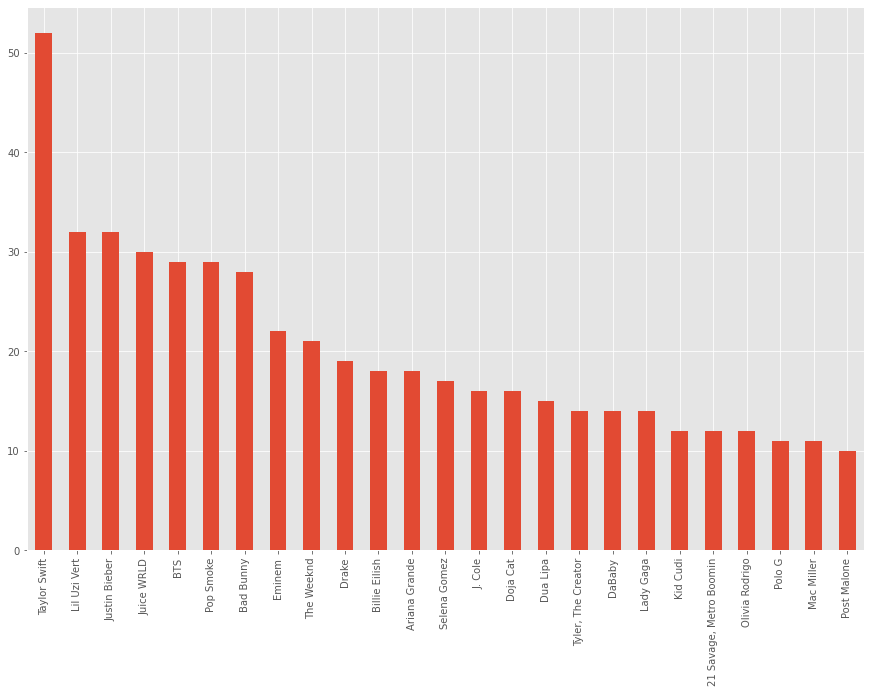

In [112]:
df['Artist'].value_counts()[:25].plot(kind= 'bar', figsize = (15,10))

### Number of Times Charted vs. Their Popularity

<AxesSubplot:xlabel='Number of Times Charted', ylabel='Popularity'>

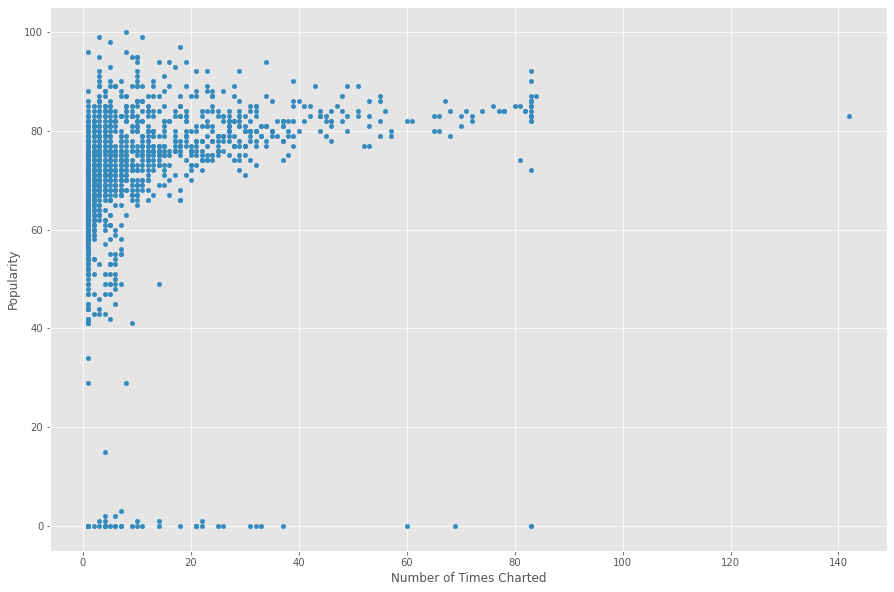

In [113]:
df.plot.scatter(x = 'Number of Times Charted', y = 'Popularity', figsize=(15,10))

### Deleting Columns I didn't need anymore

In [114]:
del df['Weeks Charted']

In [115]:
df['Duration (s)'] = df['Duration (ms)'].div(1000)
del df['Duration (ms)']
df.head(5)

,Index,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Song Name,Streams,Artist,Artist Followers,Song ID,Genre,Release Date,Popularity,Danceability,Energy,Loudness,Tempo,Chord,Duration (s)
0,66,2,83,2020-03-27--2020-04-03,Don't Start Now,8821971,Dua Lipa,1250353,7njGslFmqBmOSSOpTyZCs9,[],8/13/2021,0,0.79,0.79,-4.52,123.95,B,183.290
1,84,76,3,2020-03-27--2020-04-03,Love Again,7465445,Dua Lipa,1250353,2sN1pMv6d2t5GlvN6IBMlK,[],8/13/2021,0,0.66,0.67,-4.67,115.98,B,258.004
2,119,5,21,2021-03-19--2021-03-26,Hold On,6300416,Justin Bieber,1250353,49xx65gvlD7xXjDTavFqaJ,[],8/13/2021,0,0.66,0.63,-5.80,139.98,C#/Db,170.813
3,157,68,6,2021-07-02--2021-07-09,Ramenez la coupe à la maison,5576844,Vegedream,1250353,0dqVP9CnGjaYNjya3gYbYy,[],8/13/2021,0,0.81,0.66,-6.24,107.99,C,235.556
4,165,13,83,2020-01-24--2020-01-31,bad guy,5436286,Billie Eilish,1250353,1hewNsVmijBqjKvFRQfk4m,[],8/13/2021,0,0.70,0.43,-10.97,135.13,G,194.088


Any missing data points were removed from the original excel sheet, as it messed up the correlations and groupby functions. I removed the valence acousticness, instrumentalness, liveness, speechiness, and weeks charted columns. Anything that had to do with the making of the musics (acoustics, etc.) is based on what Spotify thinks the music contains. Weeks charted was removed since there were too many dates. Duration (ms) was changed to Duration (s).

### Creating a Year Released Column

In [135]:
df['Year Released'] = df['Release Date'].str.split('/').str[2]
df['Year Released'].astype('int64')

0       2021
1       2021
2       2021
3       2021
4       2021
        ... 
1538    1905
1539    1905
1540    1905
1541    1905
1542    1905
Name: Year Released, Length: 1543, dtype: int64

### just in case

In [137]:
df['Duration (s)'].astype('float')

0       183.290
1       258.004
2       170.813
3       235.556
4       194.088
         ...   
1538    267.600
1539    250.987
1540    181.267
1541    166.453
1542    192.160
Name: Duration (s), Length: 1543, dtype: float64

I tried to make an area graph of the number of rap, pop, latin, and hip hop songs over the years but it didn't work any of the ways I tried :(

### Attempt 1 & 2 of trying to make a graph

In [118]:
df_rap = df[df['Genre'].str.contains('rap')]
df_pop = df[df['Genre'].str.contains('pop')]
df_latin = df[df['Genre'].str.contains('latin')]
df_hip_hop = df[df['Genre'].str.contains('hip hop')]
min_year = df['Year Released'].min()
max_year = df['Year Released'].max()

In [119]:
df_rap_by_year=df_rap['Year Released'].value_counts()
df_pop_by_year = df_pop['Year Released'].value_counts()
df_latin_by_year = df_latin['Year Released'].value_counts()
df_hip_hop_by_year = df_hip_hop['Year Released'].value_counts()

In [120]:
#df_area = pd.DataFrame({df_rap_by_year, df_pop_by_year, df_latin_by_year, df_hip_hop_by_year}, index = (min_year, max_year))

#df_area.plot(kind='area', stacked=False)
#plt.show(block=true)

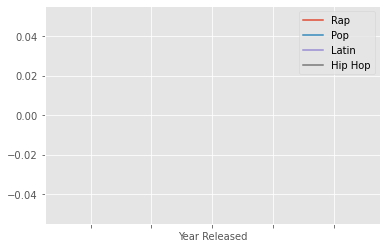

In [121]:
df2 = pd.DataFrame((df_rap_by_year, df_pop_by_year, df_latin_by_year, df_hip_hop_by_year), columns = ['Rap', 'Pop', 'Latin', 'Hip Hop'])
df2.plot()
plt.show()

### Actual Graph I Got :DDD yippee

<AxesSubplot:>

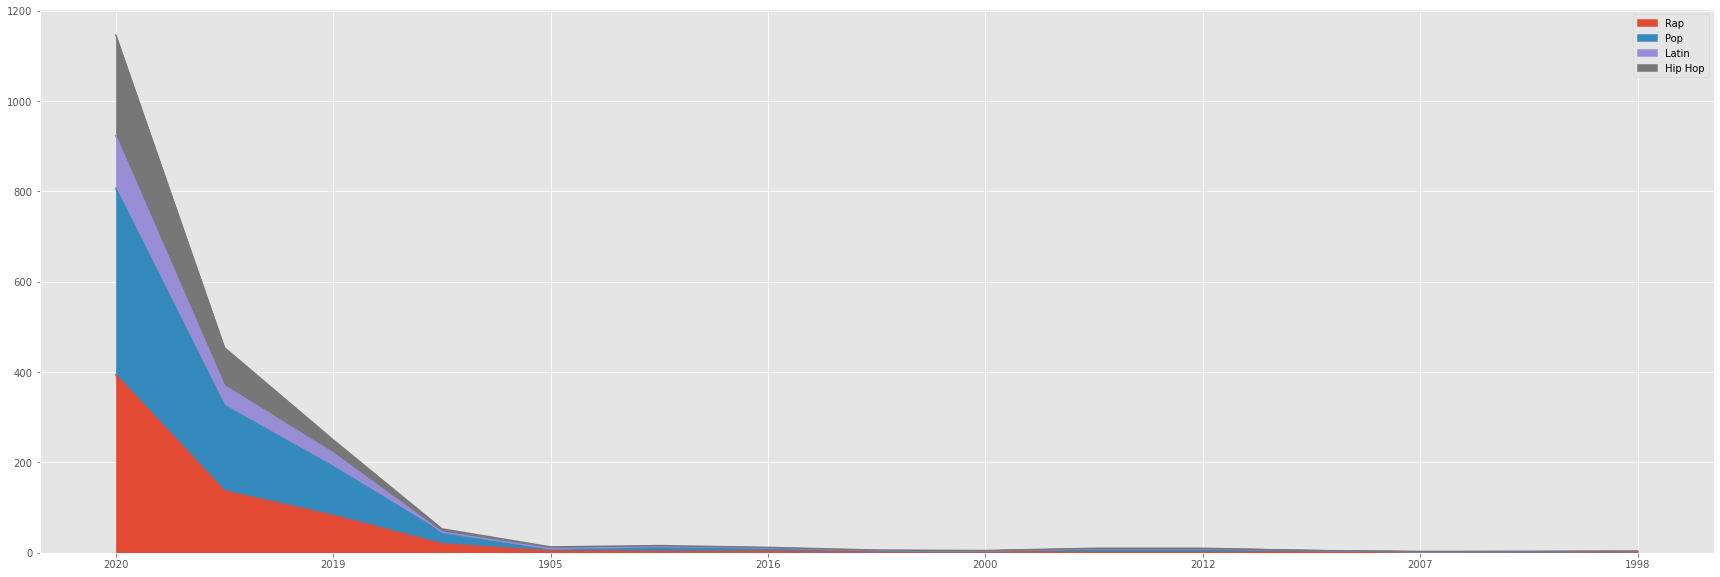

In [122]:
df1 = pd.DataFrame(columns = ['Rap', 'Pop', 'Latin', 'Hip Hop'])
df1['Rap'] = df_rap_by_year
df1['Pop'] = df_pop_by_year
df1['Latin'] = df_latin_by_year
df1['Hip Hop'] = df_hip_hop_by_year
df1.plot.area(figsize=(30,10))

### Number of Songs per Genre combinations

<AxesSubplot:>

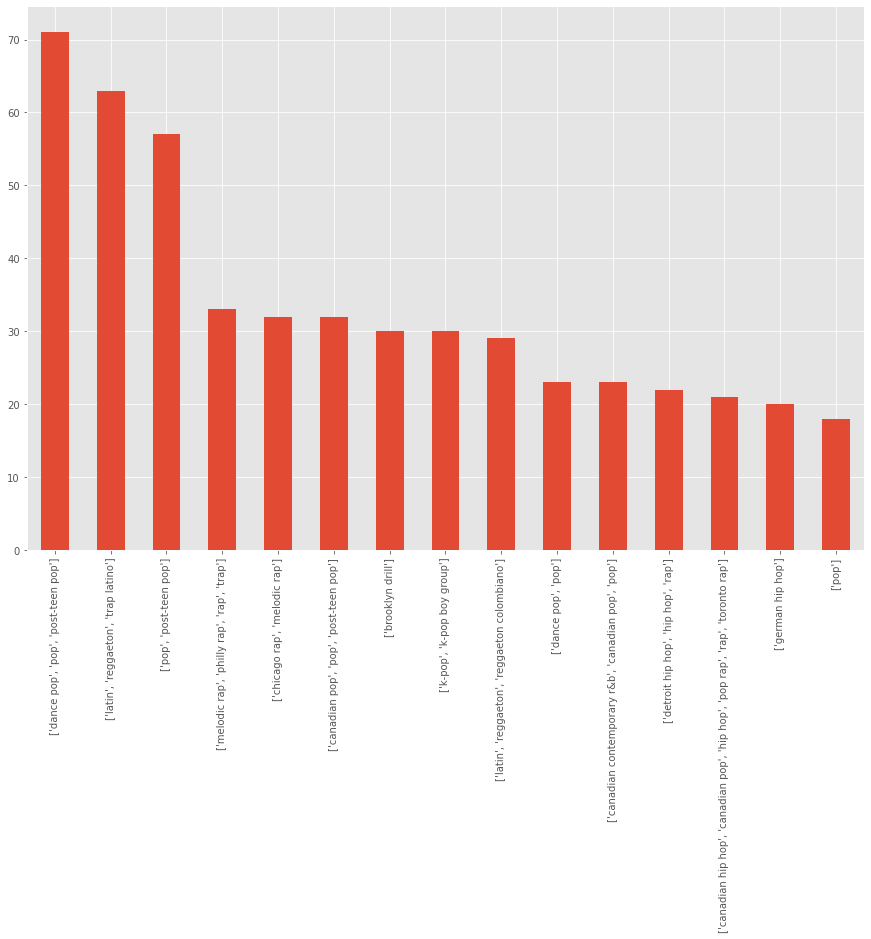

In [123]:
df_top_genre = df['Genre'].value_counts()[1:16]
df_top_genre.plot.bar(figsize= (15,10))

I tried to make a graph with top genres per year, but here are the counts for the top 15 genres from all of the data. :'( <br>
(post) I DID IT!!

### Percentage of the top 25 genre combinations

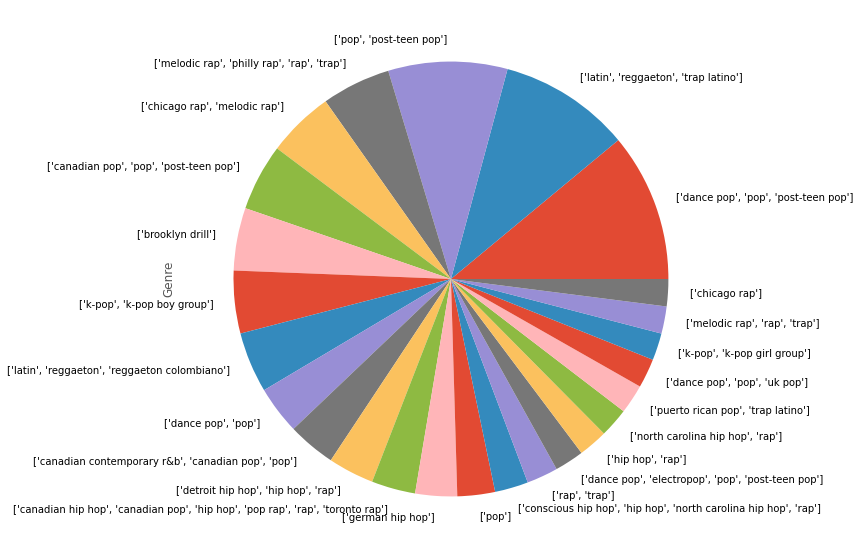

In [124]:
df_genre = df['Genre'].value_counts()[1:26].plot(kind = 'pie', figsize= (15,10))

### Top Genres Value Counts

In [125]:
df['Genre'].value_counts().head(25)

[]                                                                                  75
['dance pop', 'pop', 'post-teen pop']                                               71
['latin', 'reggaeton', 'trap latino']                                               63
['pop', 'post-teen pop']                                                            57
['melodic rap', 'philly rap', 'rap', 'trap']                                        33
['chicago rap', 'melodic rap']                                                      32
['canadian pop', 'pop', 'post-teen pop']                                            32
['brooklyn drill']                                                                  30
['k-pop', 'k-pop boy group']                                                        30
['latin', 'reggaeton', 'reggaeton colombiano']                                      29
['dance pop', 'pop']                                                                23
['canadian contemporary r&b', 'canadian pop

### Songs that Charted the Most Times

In [126]:
df_max = df[['Song Name', 'Number of Times Charted', 'Artist']].groupby('Song Name', as_index = False).value_counts()
df_max.sort_values(by='Number of Times Charted', ascending = False).head(10)

,Song Name,Number of Times Charted,Artist,count
410,Falling,142,Harry Styles,1
258,Circles,84,Post Malone,1
158,Believer,83,Imagine Dragons,1
47,Adore You,83,Harry Styles,1
1149,Someone You Loved,83,Lewis Capaldi,1
793,Memories,83,Maroon 5,1
948,Perfect,83,Ed Sheeran,1
350,Don't Start Now,83,Dua Lipa,1
1037,Roses - Imanbek Remix,83,SAINt JHN,1
751,Lucid Dreams,83,Juice WRLD,1


### Songs Released per Month that Charted

<AxesSubplot:>

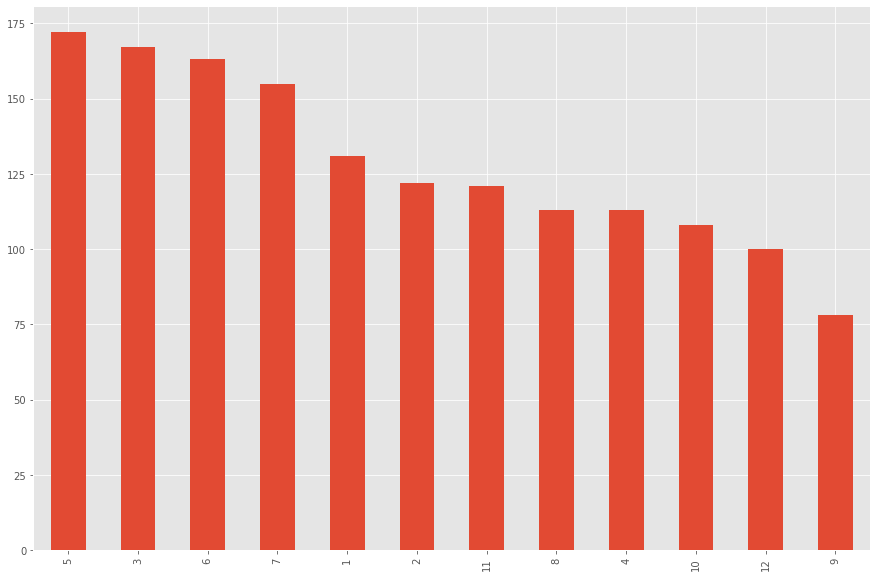

In [127]:
df['Month Released'] = df['Release Date'].str.split('/').str[0]
df['Month Released'].value_counts().plot(kind='bar', figsize = (15,10))

This bar graph shows which month has the most songs that charted. May has the most and September has the least.

### Danceability vs. Popularity
People love to boogie

<AxesSubplot:xlabel='Danceability_x'>

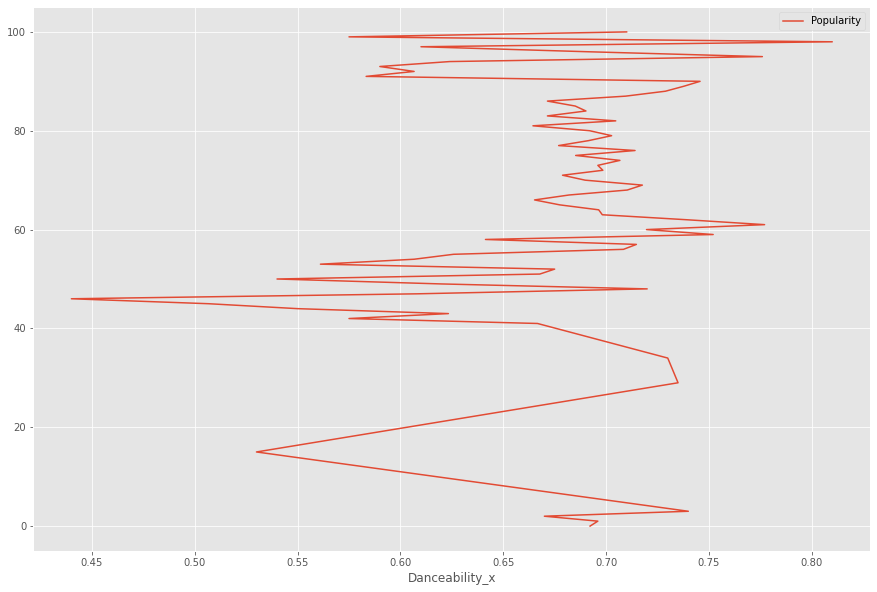

In [128]:
average_dance = df[['Artist', 'Danceability']].groupby('Artist', as_index = False).mean()
joined = df.merge(average_dance, on= 'Artist', how='inner')
joined.head()
graph_pop_dance = joined[['Popularity', 'Danceability_x']].groupby('Popularity', as_index = False).mean()
graph_pop_dance.plot(x='Danceability_x', y='Popularity', figsize=(15,10), grid=True)

### Length of the Song v. Duration

<AxesSubplot:xlabel='Duration (s)'>

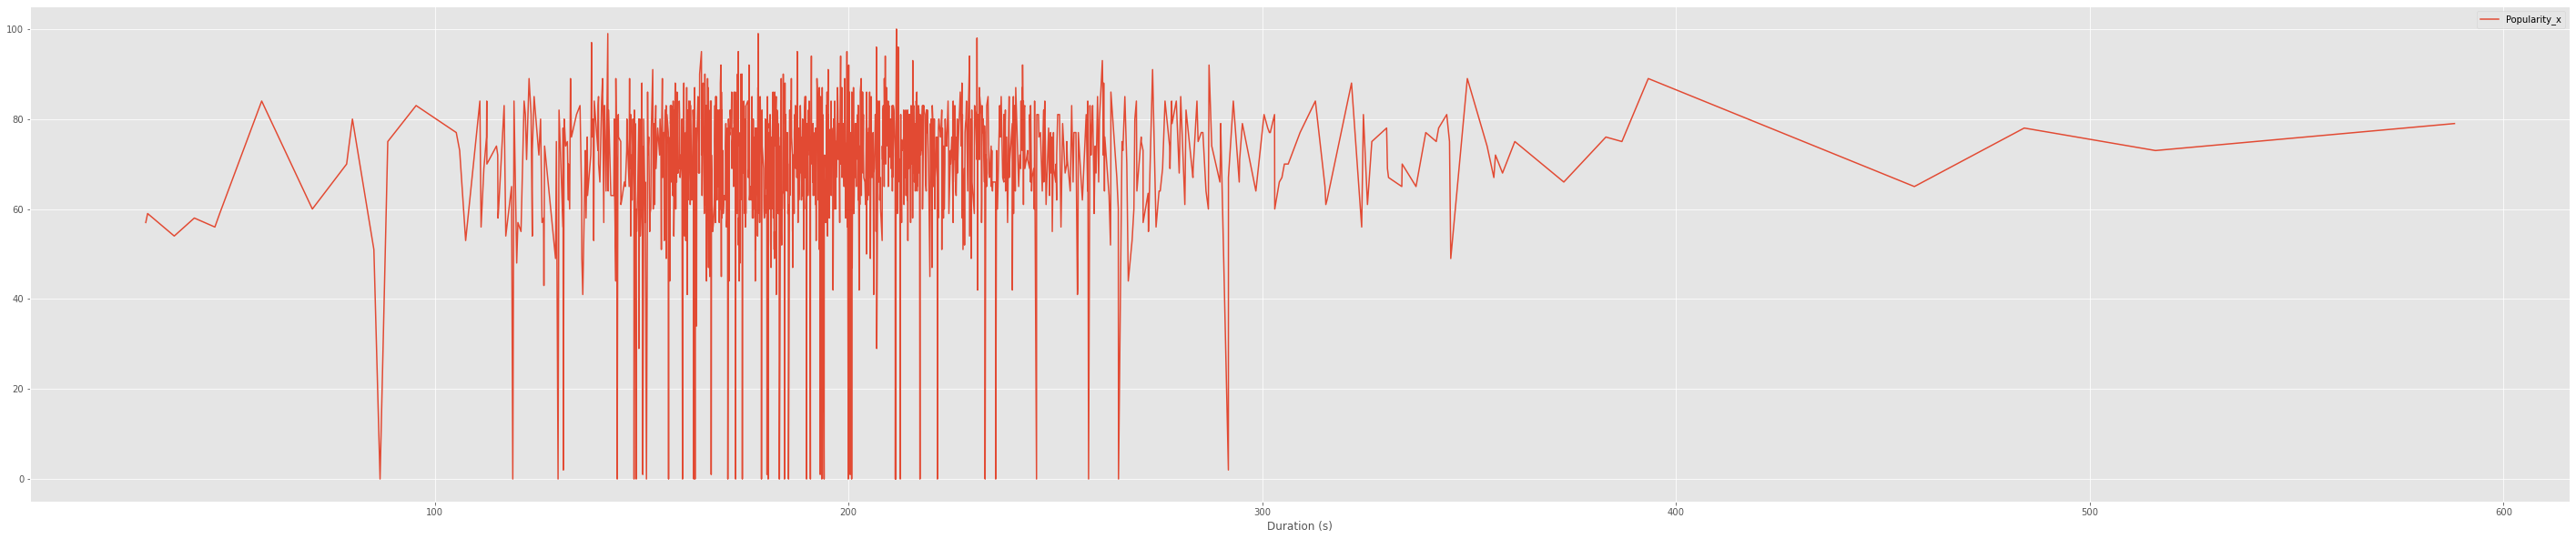

In [129]:
average_len = df[['Duration (s)', 'Popularity']].groupby('Duration (s)', as_index = False).mean()
joined1 = df.merge(average_len, on= 'Duration (s)', how='inner')
joined1.head()
len_dur = joined1[['Duration (s)', 'Popularity_x']].groupby('Duration (s)', as_index = False).mean()
len_dur.plot(x='Duration (s)', y='Popularity_x', figsize=(50,10), grid=True)

This graph is really ugly but it shows most songs are around the 3-5 minute range. Duration has no effect on danceability.

### Songs that Charted the Longest and Peak Position was 1

In [130]:
longest_time = df[['Song Name','Artist','Number of Times Charted', 'Highest Charting Position']].groupby(['Song Name','Artist', 'Number of Times Charted', 'Highest Charting Position'], as_index = False).value_counts()
longest_time1 = longest_time.sort_values(by='Highest Charting Position', ascending = True).head(10)
longest_time1.sort_values(by= 'Number of Times Charted', ascending = False)

,Song Name,Artist,Number of Times Charted,Highest Charting Position,count
304,Dance Monkey,Tones And I,83,1,1
1079,Savage Love (Laxed - Siren Beat),"Jawsh 685, Jason Derulo",55,1,1
1000,Rain On Me (with Ariana Grande),Lady Gaga,55,1,1
1332,WAP (feat. Megan Thee Stallion),Cardi B,51,1,1
1518,positions,Ariana Grande,40,1,1
1200,THE SCOTTS,"THE SCOTTS, Travis Scott, Kid Cudi",27,1,1
945,Peaches (feat. Daniel Caesar & Giveon),Justin Bieber,19,1,1
1450,cardigan,Taylor Swift,12,1,1
1474,good 4 u,Olivia Rodrigo,11,1,1
157,Beggin',Måneskin,8,1,1


### Artists with the Most Followers and the Number of Times they charted

In [131]:
df2 = df[['Artist', 'Artist Followers', 'Number of Times Charted']].groupby(['Artist','Artist Followers']).count()
df2.sort_values(by='Artist Followers', ascending = False).head(20)

Number of Times Charted
Artist                    Artist Followers                         
Ed Sheeran                83337783                                5
                          83293380                                3
Ariana Grande             67208170                               16
                          67158068                                2
Drake                     56327031                               16
Future, Drake, Young Thug 56327031                                1
Drake                     56308172                                3
Drake, WizKid, Kyla       56308172                                1
Justin Bieber             48544923                               27
Justin Bieber, Kehlani    48544923                                1
Justin Bieber, Quavo      48544923                                1
Justin Bieber             48504126                                3
Billie Eilish             47061119                                6
                          47014200                                3
Eminem                    46814751                               19
                          46785561                                3
Taylor Swift              42227614                               52
BTS                       37151476                               22
                          37106176                                7
Bad Bunny, Daddy Yankee   36177712                                1

### 3D Graph of Artist Followers, Popularity and the Number of Times they charted. 
(spot harry styles he's the most obvious one)

<AxesSubplot:xlabel='Popularity', ylabel='Artist Followers'>

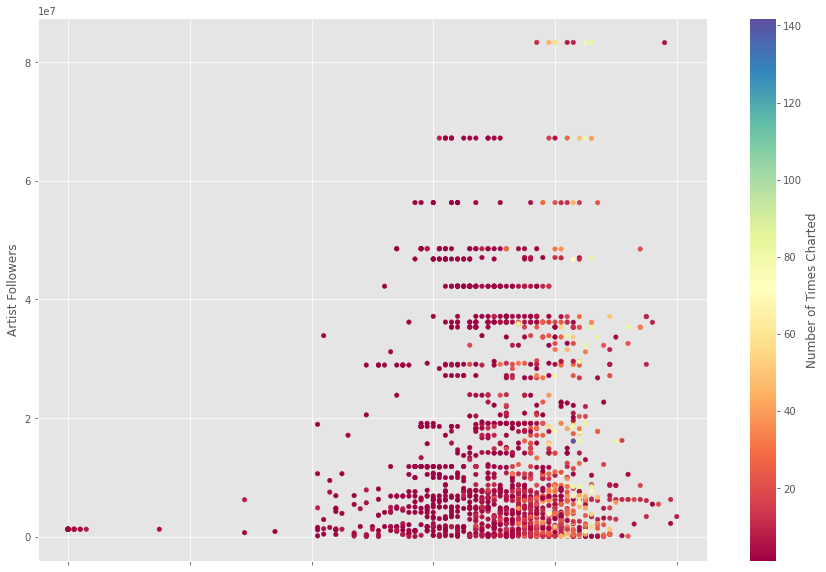

In [132]:
df.plot.scatter(x='Popularity',y='Artist Followers',c='Number of Times Charted',cmap='Spectral',figsize=(15,10))

### Conclusion

In conclusion, this dataset was very hard to work with. Some things I wanted in this dataset weren't there at all. When I tried to do certain graphs or functions it yelled at me :|. The dataset didn't have many missing points, but those it was missing I just deleted in Excel. I tried making an animated graph (v hard wth) and an area graph, but all of the examples I could find were of random numbers. When I finally got the area graph, I was very happy. I also tried to make an animated graph of the top genres over time but alas. Overall, this dataset has many values, but some of them are hard to work with/correlate.